安装FoolBox

    pip install foolbox



In [1]:
#参考：
#https://foolbox.readthedocs.io/en/latest/user/examples.html
import foolbox
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50,decode_predictions
from foolbox.criteria import TargetClassProbability

"""
keras.backend.set_learning_phase(0) # train mode

keras.backend.set_learning_phase(1) # predict mode

之所以这么区分，是因为某些层在预测和训练时不同 比如BN和Dropout
"""
keras.backend.set_learning_phase(1)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

# get source image and label
image, label = foolbox.utils.imagenet_example()

# apply attack on source image
# ::-1 reverses the color channels, because Keras ResNet50 expects BGR instead of RGB
# attack = LBFGSAttack(model=fmodel, criterion=TargetClassProbability(781, p=.5))
attack = foolbox.attacks.LocalSearchAttack(fmodel)


adversarial = attack(image[:, :, ::-1], label)
# if the attack fails, adversarial will be None and a warning will be printed

if adversarial is not None:
    adversarial_label=np.argmax(fmodel.predictions(adversarial))
    print("Adversarial label={}，Original label={}".format(adversarial_label,label))
else:
    print("Fail to LocalSearchAttack!")

Using TensorFlow backend.


Adversarial label=281，Original label=282


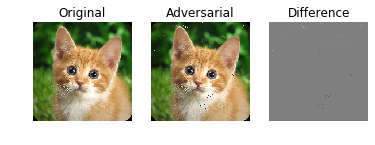

In [2]:
# if you use Jupyter notebooks
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image / 255)  # division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adversarial[:, :, ::-1] / 255)  # ::-1 to convert BGR to RGB
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial[:, :, ::-1] - image
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()

In [3]:
print(np.where(difference!=0.0))

(array([  1,   1,   1, ..., 223, 223, 223]), array([116, 116, 116, ..., 189, 189, 189]), array([0, 1, 2, ..., 0, 1, 2]))
